In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from components import *
import math
import matplotlib

In [2]:
sns.set()

In [3]:
X = np.linspace(0, 10, 100).reshape((100, 1)) + np.random.randn(100, 1)
normX = lambda x: (x-min(X))/(max(X)-min(X))
Xn = normX(X)
y = X**3 + 2 + 2*np.random.randn(100, 1)

In [5]:
network = Network_Dense(
    sizes=[1, 16, 16, 1],
    activation=Activation_Tanh,
    final_activation=Activation_Linear,
    optimizer=Optimizer_SGDM,
    loss=MSE,
)

In [6]:
network.train(Xn, y, epochs=100000)
#print(network.losses[0], network.losses[-1], f'(-{1-network.losses[-1]/network.losses[0]:.6%})', network.output.mean())

epoch:	100000, loss: 3.53629 (-100.00%), time: 21/21s           

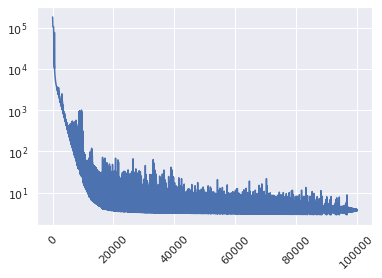

In [7]:
plt.yscale('log')
plt.xticks(rotation=45)
plt.plot(network.losses)

In [8]:
Xp = np.linspace(min(X), max(X))
yp = network.predict(normX(Xp))

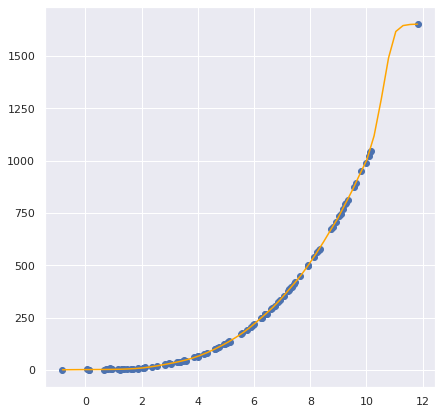

In [9]:
plt.figure(figsize=(7, 7))
plt.scatter(X, y)
plt.plot(Xp, yp, color='orange')